In [1]:
import pandas as pd
import numpy as np
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
import matplotlib.pyplot as plt
from netCDF4 import Dataset as NetCDFFile
import C14preproc as prep
import pylab
import C14utils
import matplotlib
import socplot_lib as socplt
import isamcalc_lib as isam
import SOCtools as soc


In [3]:
# Read in the 1-D model output from NetCDF file
# Path
respath='/data/jain1/d/sshu3/SBGC_1d'
contemp='2001_2010'

fobs = '/data/jain1/c/sshu3/SBGC/data/C14/C14processing/srdb-data-V4_extracted.csv'
# Read in obs
obs = pd.read_csv(fobs, sep=',', header=0)

# 3D files
fp=respath+'/mean_bgc3d_'+contemp+'.nc'
nclu=NetCDFFile(fp,'r')
resp_contemp = nclu.variables['soil_resp'][:]
nclu.close()

# 2D files
fp=respath+'/mean_bgp2d_'+contemp+'.nc'
nclu=NetCDFFile(fp,'r')
tas_contemp = nclu.variables['tavg_avg_yr'][:]
nclu.close()

# Next is 0-D results
# Read the 2D files
respath='/data/jain1/d/sshu3/SBGC_0d'
fp=respath+'/mean_bgc3d_'+contemp+'.nc'
nclu=NetCDFFile(fp,'r')
resp0d_contemp = nclu.variables['soil_resp'][:]
nclu.close()

# 2D files
fp=respath+'/mean_bgp2d_'+contemp+'.nc'
nclu=NetCDFFile(fp,'r')
tas0d_contemp = nclu.variables['tavg_avg_yr'][:]
nclu.close()

# Check the latitude/longitude of the obs and link the model output with these observation
latsrdb = obs.Latitude.as_matrix()
lonsrdb = obs.Longitude.as_matrix()
sz = len(latsrdb)
isam_1d_res = np.zeros((sz))
isam_0d_res = np.zeros((sz))
isam_1d_tas = np.zeros((sz))
isam_0d_tas = np.zeros((sz))
lc_code = obs.LC_code.as_matrix()
for i in np.arange(0,sz):
    loc = isam.latlon_2_idx(latsrdb[i],lonsrdb[i])
    isam_1d_res[i] = resp_contemp[lc_code[i]-1, loc[0]-1, loc[1]-1]*1000.
    isam_1d_tas[i] = tas_contemp[loc[0]-1, loc[1]-1]-273.16
    isam_0d_res[i] = resp0d_contemp[lc_code[i]-1, loc[0]-1, loc[1]-1]*1000.
    isam_0d_tas[i] = tas0d_contemp[loc[0]-1, loc[1]-1]-273.16

# Combine the data in the same gridcell to prevent double counting
for i in np.arange(0,sz):
    if (i > 0):
        if(isam_1d_res[i] == isam_1d_res[i-1]):
            isam_1d_res[i-1] = np.float('nan')
            isam_1d_tas[i-1] = np.float('nan')
            isam_0d_res[i-1] = np.float('nan')
            isam_0d_tas[i-1] = np.float('nan')

# Remove the data if the corresponding biome from model has no values.
for i in np.arange(0,sz):
    if(isam_1d_res[i]<=0.):
        isam_1d_res[i] = np.float('nan')
        isam_1d_tas[i] = np.float('nan')
        isam_0d_res[i] = np.float('nan')
        isam_0d_tas[i] = np.float('nan')

# # Get the final lc list, where both model output matches the biome type from the observation
# lc_code_new = lc_code.astype('float')
# lc_code_new[np.isnan(lc_dom)] = np.float('nan')

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:47: UserWarning: Warning: converting a masked element to nan.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:48: UserWarning: Warning: converting a masked element to nan.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: UserWarning: Warning: converting a masked element to nan.
/data/keeling/a/sshu3/anaconda2/lib/p

In [ ]:
# print the latid and lonid of each sample for ISAM simulation usage
for i in np.arange(0,rc_number):
    loc = isam.latlon_2_idx(obs.Latitude[i],obs.Longitude[i])
    print(loc)

In [ ]:
plt.figure(figsize=(10,6))
plt.xlim([0,1200])
plt.ylim([0,1200])
plt.xlabel('SRDB Rh ($gC/m^2$)', fontsize=20)
plt.ylabel('ISAM-1D Rh ($gC/m^2$)', fontsize=20)
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==3], isam_1d_res[lc_code==3], color='orange')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==4], isam_1d_res[lc_code==4], color='red')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==5], isam_1d_res[lc_code==5], color='green')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==20], isam_1d_res[lc_code==20], color='cyan')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==7], isam_1d_res[lc_code==7], color='blue')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==8], isam_1d_res[lc_code==8], color='black')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==12], isam_1d_res[lc_code==12], color='pink')
plt.legend(['Temperate_evergreen', 'Temperate_deciduous', 'Boreal_evergreen', 'Boreal_deciduous', 'Grassland', 'Shrubland', 'Cropland'])
#plt.savefig('./figures/fig_srdb_1d.png')

In [ ]:
plt.figure(figsize=(10,6))
plt.xlim([0,1200])
plt.ylim([0,1200])
plt.xlabel('SRDB Rh ($gC/m^2$)', fontsize=20)
plt.ylabel('ISAM-0D Rh ($gC/m^2$)', fontsize=20)
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==3], isam_0d_res[lc_code==3], color='orange')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==4], isam_0d_res[lc_code==4], color='red')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==5], isam_0d_res[lc_code==5], color='green')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==20], isam_0d_res[lc_code==20], color='cyan')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==7], isam_0d_res[lc_code==7], color='blue')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==8], isam_0d_res[lc_code==8], color='black')
plt.scatter(obs.Rh_annual.as_matrix()[lc_code==12], isam_0d_res[lc_code==12], color='pink')
plt.legend(['Temperate_evergreen', 'Temperate_deciduous', 'Boreal_evergreen', 'Boreal_deciduous', 'Grassland', 'Shrubland', 'Cropland'])
plt.savefig('./figures/fig_srdb_0d.png')

In [ ]:
plt.figure(figsize=(10,6))
plt.xlim([0,1200])
plt.ylim([0,1200])
plt.xlabel('ISAM-1D Rh ($gC/m^2$)', fontsize=20)
plt.ylabel('ISAM-0D Rh ($gC/m^2$)', fontsize=20)
plt.scatter(isam_1d_res[lc_code==3], isam_0d_res[lc_code==3], color='orange')
plt.scatter(isam_1d_res[lc_code==4], isam_0d_res[lc_code==4], color='red')
plt.scatter(isam_1d_res[lc_code==5], isam_0d_res[lc_code==5], color='green')
plt.scatter(isam_1d_res[lc_code==20], isam_0d_res[lc_code==20], color='cyan')
plt.scatter(isam_1d_res[lc_code==7], isam_0d_res[lc_code==7], color='blue')
plt.scatter(isam_1d_res[lc_code==8], isam_0d_res[lc_code==8], color='black')
plt.scatter(isam_1d_res[lc_code==12], isam_0d_res[lc_code==12], color='pink')
plt.legend(['Temperate_evergreen', 'Temperate_deciduous', 'Boreal_evergreen', 'Boreal_deciduous', 'Grassland', 'Shrubland', 'Cropland'])

In [ ]:
# Boxplot of the total SOC in the first 1m
# Shijie: Shall filter out peat before plotting!
srdb = obs.Rh_annual.as_matrix().astype('float')
srdb[np.isnan(isam_1d_res)] = np.float('nan')
#data_for_bplot = [isam_0d_res, isam_1d_res, obs.Rh_annual.as_matrix()]

data_for_bplot = [isam_0d_res[~np.isnan(isam_0d_res)], isam_1d_res[~np.isnan(isam_1d_res)], srdb[~np.isnan(srdb)]]

# multiple box plots on one figure
plt.figure(figsize=(24,15))
boxprops = dict(linestyle='-', linewidth=4, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=18,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanprops = dict(marker='^', markerfacecolor='blue', markersize=18,
                  linestyle='none')
#meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

plt.boxplot(data_for_bplot, boxprops=boxprops, flierprops=flierprops, \
           medianprops=medianprops, meanprops=meanprops, showmeans=True) #, meanlineprops=meanlineprops)
plt.xticks([1, 2, 3], ['ISAM-0D', 'ISAM-1D', 'OBS (SRDB)'], fontsize=30)
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], fontsize=30)
#plt.xlim((0, 9))
#plt.ylim((-500, 500))
#plt.xlabel('xlabel')
plt.ylabel('Heterotrophic Respiration ($gC/m^2$)', fontsize=30)
plt.grid(color='gray', which='major', axis='both', alpha=0.3)
plt.minorticks_on()
#plt.axhline((np.nanmean(data_for_bplot[2])+np.nanmean(data_for_bplot[3]))/2, color="gray", linestyle= 'dashdot')
plt.tick_params(axis='x',which='major',direction='in',length=8, width=2)
plt.tick_params(axis='x',which='minor',bottom='off')
plt.tick_params(axis='y',which='major',direction='in',length=8, width=2)
plt.tick_params(axis='y',which='minor',direction='in',length=3)
plt.tick_params(axis="x", which="major", top=True)
plt.tick_params(axis="y", which="both", right=True)
plt.tick_params(axis='x', pad=20)

plt.show()
#plt.savefig('./figures/fig_rh.png')


In [ ]:
# Check NPP here
# Read in the 1-D model output from NetCDF file
# Path
respath='/data/jain1/d/sshu3/SBGC_1d'
contemp='2001_2010'

# 3D files
fp=respath+'/mean_bgp3d_'+contemp+'.nc'
nclu=NetCDFFile(fp,'r')
anpp_contemp = nclu.variables['ANPP'][:]
nclu.close()

# Next is 0-D results
# Read the 2D files
respath='/data/jain1/d/sshu3/SBGC_0d'
fp=respath+'/mean_bgc3d_'+contemp+'.nc'
nclu=NetCDFFile(fp,'r')
anpp0d_contemp = nclu.variables['ANPP'][:]
nclu.close()

# Check the latitude/longitude of the obs and link the model output with these observation
latsrdb = obs.Latitude.as_matrix()
lonsrdb = obs.Longitude.as_matrix()
sz = len(latsrdb)
isam_1d_res = np.zeros((sz))
isam_0d_res = np.zeros((sz))
lc_code = obs.LC_code.as_matrix()
for i in np.arange(0,sz):
    loc = isam.latlon_2_idx(latsrdb[i],lonsrdb[i])
    isam_1d_res[i] = anpp_contemp[lc_code[i]-1, loc[0]-1, loc[1]-1]*1000.
    isam_0d_res[i] = anpp0d_contemp[lc_code[i]-1, loc[0]-1, loc[1]-1]*1000.

# Combine the data in the same gridcell to prevent double counting
for i in np.arange(0,sz):
    if (i > 0):
        if(isam_1d_res[i] == isam_1d_res[i-1]):
            isam_1d_res[i-1] = np.float('nan')
            isam_0d_res[i-1] = np.float('nan')

# Remove the data if the corresponding biome from model has no values.
for i in np.arange(0,sz):
    if(isam_1d_res[i]<=0.):
        isam_1d_res[i] = np.float('nan')
        isam_0d_res[i] = np.float('nan')

# Get the final lc list, where both model output matches the biome type from the observation
lc_code_new = lc_code.astype('float')
lc_code_new[np.isnan(lc_dom)] = np.float('nan')

In [5]:
obs.NPP

0       111.0
1       188.5
2       366.5
3       403.0
4       432.0
5       362.0
6       211.0
7        74.0
8       490.0
9       261.0
10      584.0
11      429.0
12      326.0
13      262.0
14        NaN
15        NaN
16        NaN
17       91.0
18        NaN
19        NaN
20        NaN
21      399.5
22      138.0
23        NaN
24        NaN
25      140.0
26       91.0
27        NaN
28        NaN
29        NaN
        ...  
122       NaN
123       NaN
124       NaN
125     529.0
126     202.0
127    1474.0
128       NaN
129     893.0
130     616.0
131     559.0
132       NaN
133       NaN
134       NaN
135       NaN
136       NaN
137       NaN
138       NaN
139       NaN
140       NaN
141       NaN
142       NaN
143       NaN
144       NaN
145       NaN
146     830.0
147     708.0
148     735.0
149     795.0
150     847.0
151     704.0
Name: NPP, Length: 152, dtype: float64

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/data/keeling/a/s

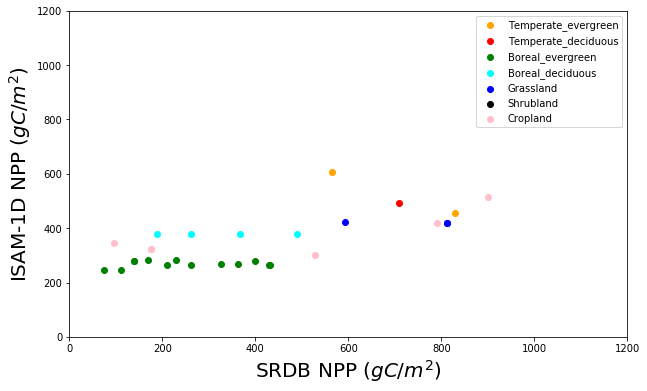

In [4]:
plt.figure(figsize=(10,6))
plt.xlim([0,1200])
plt.ylim([0,1200])
plt.xlabel('SRDB NPP ($gC/m^2$)', fontsize=20)
plt.ylabel('ISAM-1D NPP ($gC/m^2$)', fontsize=20)
plt.scatter(obs.NPP.as_matrix()[lc_code==3], isam_1d_res[lc_code==3], color='orange')
plt.scatter(obs.NPP.as_matrix()[lc_code==4], isam_1d_res[lc_code==4], color='red')
plt.scatter(obs.NPP.as_matrix()[lc_code==5], isam_1d_res[lc_code==5], color='green')
plt.scatter(obs.NPP.as_matrix()[lc_code==20], isam_1d_res[lc_code==20], color='cyan')
plt.scatter(obs.NPP.as_matrix()[lc_code==7], isam_1d_res[lc_code==7], color='blue')
plt.scatter(obs.NPP.as_matrix()[lc_code==8], isam_1d_res[lc_code==8], color='black')
plt.scatter(obs.NPP.as_matrix()[lc_code==12], isam_1d_res[lc_code==12], color='pink')
plt.legend(['Temperate_evergreen', 'Temperate_deciduous', 'Boreal_evergreen', 'Boreal_deciduous', 'Grassland', 'Shrubland', 'Cropland'])
#plt.savefig('./figures/fig_srdb_1d_npp.png')

In [ ]:
plt.figure(figsize=(10,6))
plt.xlim([0,1200])
plt.ylim([0,1200])
plt.xlabel('SRDB NPP ($gC/m^2$)', fontsize=20)
plt.ylabel('ISAM-0D NPP ($gC/m^2$)', fontsize=20)
plt.scatter(obs.NPP.as_matrix()[lc_code==3], isam_0d_res[lc_code==3], color='orange')
plt.scatter(obs.NPP.as_matrix()[lc_code==4], isam_0d_res[lc_code==4], color='red')
plt.scatter(obs.NPP.as_matrix()[lc_code==5], isam_0d_res[lc_code==5], color='green')
plt.scatter(obs.NPP.as_matrix()[lc_code==20], isam_0d_res[lc_code==20], color='cyan')
plt.scatter(obs.NPP.as_matrix()[lc_code==7], isam_0d_res[lc_code==7], color='blue')
plt.scatter(obs.NPP.as_matrix()[lc_code==8], isam_0d_res[lc_code==8], color='black')
plt.scatter(obs.NPP.as_matrix()[lc_code==12], isam_0d_res[lc_code==12], color='pink')
plt.legend(['Temperate_evergreen', 'Temperate_deciduous', 'Boreal_evergreen', 'Boreal_deciduous', 'Grassland', 'Shrubland', 'Cropland'])
plt.savefig('./figures/fig_srdb_0d_npp.png')

In [ ]:
# =====================================================================
# Optional
# =====================================================================
# 2) The comparison of the accumulated SOC profile
obs_aggprof_avg = np.nanmean(obs_agg_prof, axis=0)
mod_aggprof_avg = np.nanmean(mod_agg_prof, axis=0)
obs_aggprof_std = np.nanstd(obs_isam*dz, axis=0)
mod_aggprof_std = np.nanstd(mod_isam*dz, axis=0)
obs_aggprof_avg[9] = float("nan")
obs_aggprof_std[9] = float("nan")
mod_aggprof_std[:] = 0.
obs_aggprof_std = obs_aggprof_std #/np.sqrt(146.)  # 146 is the sample size
mod_aggprof_std = mod_aggprof_std #/np.sqrt(146.)  # 146 is the sample size

soildp = z[0:8]*100
#tit = "Accumulated SOC profile"
tit = ""
path = "./figures/fig5/Um_SOC_profile.png"

kwargs = {'Xobs': obs_aggprof_avg[0:8], 'Yobs': soildp, 'Xmod': mod_aggprof_avg[0:8], 'Ymod': soildp,
          'Xobs_std': obs_aggprof_std[0:8], 'Xmod_std': mod_aggprof_std[0:8], 'tit': ' ', 'path': path}

# Figure with std as error bar
status = socplt.plot_obsvsmod_with_errbar(**kwargs)


In [ ]:
# =====================================================================
# Optional
# =====================================================================
# 3) The comparison of the accumulated SOC profile by different biomes
# Pick one biome and run the code once at a time
# 5 biomes in total:
# 7 - grassland
# 8 - shrub
# 9 - tundra
# 5 - boreal evergreen
# 20 - boreal deciduous
obs_agg_prof_pft = obs_agg_prof[mod_biome.index == 7]
mod_agg_prof_pft = 1.7*mod_agg_prof[mod_biome.index == 7]
obs_aggprof_avg = np.nanmean(obs_agg_prof_pft, axis=0)
mod_aggprof_avg = np.nanmean(mod_agg_prof_pft, axis=0)
obs_aggprof_std = np.nanstd(obs_isam[mod_biome.index == 7]*dz, axis=0)
mod_aggprof_std = np.nanstd(mod_isam[mod_biome.index == 7]*dz, axis=0)
obs_aggprof_avg[9] = float("nan")
obs_aggprof_std[9] = float("nan")
mod_aggprof_std[:] = 0.
obs_aggprof_std = obs_aggprof_std #/np.sqrt(146.)  # 146 is the sample size
mod_aggprof_std = mod_aggprof_std #/np.sqrt(146.)  # 146 is the sample size

soildp = z[0:8]*100
#tit = "Accumulated SOC profile"
tit = ""
path = "./SOC_grassland_profile.png"

status = socplt.plot_obsvsmod_with_errbar(obs_aggprof_avg[0:8], soildp, mod_aggprof_avg[0:8], soildp, obs_aggprof_std[0:8], mod_aggprof_std[0:8], tit, path)


In [ ]:
# =====================================================================
#  Plot the simulated 1-m integrated D14C profiles for Umakant's samples
#  Compare with the others?
# =====================================================================
# ==========================================
## Recalculate the Tau for 1-D ISAM model
# ==========================================
N_sample=197
fmod_pid = "caselist_197sites"
fmod_biome = "pftlist_197sites"
fmod = "isam_um_dc14.dat"
fmod_soc = "isam_um_soc.dat"

# Read in D14C from observation
data = pd.read_csv(fmod, delim_whitespace=True, header=None)
pid = pd.read_csv(fmod_pid, header=None, index_col=0)
data.index = pid.index

# Read in the SOC profile
dsoc = pd.read_csv(fmod_soc, delim_whitespace=True, header=None)
dsoc.index = pid.index
soc = dsoc.as_matrix()
frac = soc * np.float("nan")
for i in np.arange(0,7):
    frac[:,i] = soc[:,i]/(np.sum(soc[:,0:7], axis=1)+0.3*soc[:,7])
frac[:,7] = 0.3*soc[:,7]/(np.sum(soc[:,0:7], axis=1)+0.3*soc[:,7])
    
# Assign Nan value for the all the data with -9999.
data[data<-1200.] = float("nan")
# Get the C-weighted D14
d14c = np.nansum(frac * data, axis=1)
d14c[d14c==0.]=np.float("nan")

# Calculate tau
z, dz, zsoih = isam.get_isam_soildp(10)
# First get the C-weighted mean D14C for each profile
 
sampleyr = 2010 * np.ones(len(d14c))

tau, cost = C14utils.cal_tau(d14c, sampleyr, 1, 0)
# Not showing too extreme anomalies
tau[tau>=4.00000000e+03] = np.float("nan")
data['tau'] = pd.Series(tau[:,0], index=data.index)
data.nodedepth = z*100
#tau=np.loadtxt("isam_um_tau.csv")
ttt=tau.reshape(N_sample)

# ==========================================
## Recalculate the Tau for 0-D ISAM model
# ==========================================
fmod_pid = "caselist_197sites"
fmod_biome = "pftlist_197sites"
fmod = "isam_0d_dc14.dat"
fmod_soc = "isam_0d_soc.dat"

# Read in D14C from observation
data0d = pd.read_csv(fmod, delim_whitespace=True, header=None)
pid = pd.read_csv(fmod_pid, header=None, index_col=0)
data0d.index = pid.index

# Read in the SOC profile
dsoc = pd.read_csv(fmod_soc, delim_whitespace=True, header=None)
dsoc.index = pid.index
soc0d = dsoc.as_matrix()

# Assign Nan value for the all the data with -9999.
data0d[data0d<-1200.] = float("nan")
# Get the C-weighted D14
d14c0d = np.nansum(data0d, axis=1)
d14c0d[d14c0d==0.]=np.float("nan")

# Calculate tau
z, dz, zsoih = isam.get_isam_soildp(10)
# First get the C-weighted mean D14C for each profile
 
sampleyr = 2010 * np.ones(len(d14c0d[0:N_sample]))

tau0, cost = C14utils.cal_tau(d14c0d[0:N_sample], sampleyr, 1, 0)
# Not showing too extreme anomalies
tau0[tau0>=4.00000000e+03] = np.float("nan")
data['tau'] = pd.Series(tau0[:,0], index=data.index)
data.nodedepth = z*100
ttt0=tau0.reshape(N_sample)

# ==========================================
## Site level estimations of Tau
# ==========================================
# Schadel et al., 2014
tau_org = 98.95
tau_min = 2350.443
# Assume the same fraction of organic vs mineral
tau_comb = 0.5*tau_org + 0.5*tau_min 
ttt_o = [tau_org, tau_min, tau_comb]

# Knoblauch et al., 2013
tau_a = 0.26*0.0222+170.3*0.9778
tau_ana = 0.21*0.0064+2652*0.9936
# Assume the same fraction of organic vs mineral
tau_comb = 0.5*tau_a + 0.5*tau_ana 
ttt_o2 = [tau_a, tau_ana, tau_comb]

# Trumbore and Harden, 1997

tau_s1 = 62.24605043
tau_s2 = 1017.085308
#tau_s3 = 1068.201909
tau_s3 = 2485.23
#ttt_o3 = [tau_s1, tau_s2, tau_s3, tau_s4]
ttt_o3 = [tau_s1, tau_s2, tau_s3]

lit_all = ttt_o + ttt_o2 + ttt_o3
mean_lit = np.nanmean(lit_all)


data_bplot = [ttt[~np.isnan(ttt)], ttt0[~np.isnan(ttt0)], ttt_o, ttt_o2, ttt_o3]

# Plot boxplot for tau
plt.figure(figsize=(24,15))
boxprops = dict(linestyle='-', linewidth=4, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=18,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanprops = dict(marker='^', markerfacecolor='blue', markersize=18,
                  linestyle='none')
plt.boxplot(data_bplot,  boxprops=boxprops, flierprops=flierprops, \
           medianprops=medianprops, meanprops=meanprops, showmeans=True)
plt.xticks([1,2,3,4,5], ['ISAM-1D', 'ISAM-0D', 'Schadel et al.\n 2014', \
                         'Knoblauch et al.\n 2013', 'Trumbore and \n Harden, 1997'], fontsize=30)
#plt.boxplot(data_bplot,  boxprops=boxprops, flierprops=flierprops, \
#           medianprops=medianprops, meanprops=meanprops, showmeans=True)
# Add the line representing the mean value
plt.grid(color='gray', which='major', axis='both', alpha=0.3)
plt.minorticks_on()
plt.tick_params(axis='x',which='major',direction='in',length=8, width=2)
plt.tick_params(axis='x',which='minor',bottom='off')
plt.tick_params(axis='y',which='major',direction='in',length=8, width=2)
plt.tick_params(axis='y',which='minor',direction='in',length=3)
plt.tick_params(axis="x", which="major", top=True)
plt.tick_params(axis="y", which="both", right=True)
plt.tick_params(axis='x', pad=20)
plt.ylabel('Turnover Time ($year$)', fontsize=30)
plt.axhline(mean_lit, color="gray", linestyle= 'dashdot')
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000], fontsize=30)
plt.text(0.65, 3600, "(b)", fontsize=32)

plt.show()
#plt.savefig('./figures/fig5/fig5b.png')


In [ ]:
# # =====================================================================
# #  Plot the simulated SOC profiles for Umakant's samples
# #  Compare with the observation also
# # =====================================================================
# fobs = "srdb-data-V4_extracted_npp.csv"

# # Read in obs
# # 197 samples in total
# obs = pd.read_csv(fobs, sep=',', header=0)
# rc_number = obs.shape[0]

# # print the latid and lonid of each sample for ISAM simulation usage
# for i in np.arange(0,rc_number):
#     loc = isam.latlon_2_idx(obs.Latitude[i],obs.Longitude[i])
#     print(loc)

# # Merge NPP from the study
# sid = obs.Study_number[0]
# npp_box = [obs.NPP[0]]
# npp_merged = []
# for index, row in obs.iterrows():
#     if(index>0):
#         if(row['Study_number'] == sid):
#             npp_box = npp_box + [row['NPP']]
#         else:
#             temp = np.asarray(npp_box)
#             npp_sid = np.nanmean(temp)
#             npp_box = [row['NPP']]
#             sid = row['Study_number']
#             print(npp_sid)
#             npp_merged = npp_merged + [npp_sid]
#             if(index == (rc_number-1)):
#                 temp = np.asarray(npp_box)
#                 npp_sid = np.nanmean(temp)
#                 print(npp_sid)
#                 npp_merged = npp_merged + [npp_sid]
#                 npp_sites = np.asarray(npp_merged)


In [ ]:
np.nanmean(data_bplot[1])

In [ ]:
frac[41,:]

In [ ]:
soc[41,:]